# Load BSON files

In [270]:
import os
import numpy as np
import bson

def getBsonFiles(DIR):
    files = os.listdir(DIR)
    bson_files = []

    for f in files:
        if ".bson" in f:
            bson_files.append(f)

    print(bson_files)
    return bson_files

In [271]:
DATA_DIR = os.getcwd() + "/data/fddg-db3/fddg"

In [272]:
bson_files = getBsonFiles(DATA_DIR)

['users.bson', 'metas.bson', 'chunks.bson']


In [273]:
bson_data = {}

for b in bson_files:
    with open(DATA_DIR + "/" + b, "rb") as f:
        bson_data[b] = bson.decode_all(f.read())

# Load all BSON data into class objects

In [274]:
class Meta:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.subject_id = json_doc["subject_id"]
        self.phone_placement = json_doc["phone_placement"]
        self.recording_duration = json_doc["recording_duration"]
        self.chunk_ids = json_doc["chunk_ids"]
        
class Chunk:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.recording_id = json_doc["recording_id"]
        self.chunk_index = json_doc["chunk_index"]
        self.labels = json_doc["labels"]
        self.p_ecg = json_doc["p_ecg"]
        self.p_hr = json_doc["p_hr"]
        self.p_contact = json_doc["p_contact"]
        self.p_acc_x = json_doc["p_acc_x"]
        self.p_acc_y = json_doc["p_acc_y"]
        self.p_acc_z = json_doc["p_acc_z"]
        self.acc_x = json_doc["acc_x"]
        self.acc_y = json_doc["acc_y"]
        self.acc_z = json_doc["acc_z"]
        self.gyr_x = json_doc["gyr_x"]
        self.gyr_y = json_doc["gyr_y"]
        self.gyr_z = json_doc["gyr_z"]
        self.gra_x = json_doc["gra_x"]
        self.gra_y = json_doc["gra_y"]
        self.gra_z = json_doc["gra_z"]
        self.mag_x = json_doc["mag_x"]
        self.mag_y = json_doc["mag_y"]
        self.mag_z = json_doc["mag_z"]
        self.att_roll = json_doc["att_roll"]
        self.att_pitch = json_doc["att_pitch"]
        self.att_yaw = json_doc["att_yaw"]
        self.delta_heading = json_doc["delta_heading"]
        
class User:
    def __init__(self, json_doc):
        self.subject_id = json_doc["subject_id"]
        self.name = json_doc["name"]
        self.yob = json_doc["yob"]
        self.height = json_doc["height"]
        self.weight = json_doc["weight"]
        self.is_female = json_doc["is_female"]
        self.medical_conditions = json_doc["medical_conditions"]

In [275]:
metas = []
rec_chunks = {}
chunks = {}
users = {}

In [276]:
# Metas
for doc in bson_data[bson_files[1]]:
    meta = Meta(doc)
    metas.append(meta)
    
# Chunks
for doc in bson_data[bson_files[2]]:
    chunk = Chunk(doc)
    print(chunk._id)
    print(chunk.recording_id)
    print()
    
    if chunk.recording_id in rec_chunks.keys():
        rec_chunks[chunk.recording_id].append(chunk)
    else:
        rec_chunks[chunk.recording_id] = [chunk]
    
    chunks[chunk._id] = chunk

# Users
for doc in bson_data[bson_files[0]]:
    user = User(doc)
    users[user.subject_id] = user

2F3A87AB-E125-49D6-9AAE-220A94989C4B
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

F0810163-8525-422D-AA00-ABEDC54CE602
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

F518FE1F-D5A1-471A-BE73-E77A424AE3DC
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

43042735-8703-45B5-B049-4012115BC342
B8A12B80-94B0-42A3-9C1E-1C3940F671A0

A6F88A1D-AE56-4394-9F7F-61F781BE204A
43C70C64-1B29-42E3-B198-1B9443AB8808

C9FAF209-50E4-44E5-907E-FACE6AA8921B
43C70C64-1B29-42E3-B198-1B9443AB8808

C4356E89-6A93-442D-B7E2-EDF9B3B5DC07
43C70C64-1B29-42E3-B198-1B9443AB8808

C16AF2A8-2B66-41AD-BA1D-49174255ABF9
43C70C64-1B29-42E3-B198-1B9443AB8808

1F7057BF-9D53-474A-98C5-4C974F9D3110
43C70C64-1B29-42E3-B198-1B9443AB8808



In [277]:
for c in rec_chunks["B8A12B80-94B0-42A3-9C1E-1C3940F671A0"]:
    print(c._id)
    print(c.chunk_index)
    print()

2F3A87AB-E125-49D6-9AAE-220A94989C4B
0

F0810163-8525-422D-AA00-ABEDC54CE602
1

F518FE1F-D5A1-471A-BE73-E77A424AE3DC
2

43042735-8703-45B5-B049-4012115BC342
3



# Merge all chunks and meta data into a single object for each recording

In [320]:
class Recording:
    def __init__(self, meta):
        self._id = meta._id
        self.subject_id = meta.subject_id
        self.phone_placement = meta.phone_placement
        self.recording_duration = meta.recording_duration
        self.chunk_ids = meta.chunk_ids
        self.labels = []
        self.p_ecg = []
        self.p_hr = []
        self.p_acc_x = []
        self.p_acc_y = []
        self.p_acc_z = []
        self.acc_x = []
        self.acc_y = []
        self.acc_z = []
        self.gyr_x = []
        self.gyr_y = []
        self.gyr_z = []
        self.gra_x = []
        self.gra_y = []
        self.gra_z = []
        self.mag_x = []
        self.mag_y = []
        self.mag_z = []
        self.att_roll = []
        self.att_pitch = []
        self.att_yaw = []
        self.delta_heading = []
        
        print(self._id)
        r_chunks = rec_chunks[self._id]
        for c in r_chunks:
            print(c._id)
        print()
        ordered_chunk_ids = {}
        
        for chunk in r_chunks:
            ordered_chunk_ids[chunk.chunk_index] = chunk
            
        for i in range(len(r_chunks)-1):
            chunk = chunks[ordered_chunk_ids[i]._id]
            
            assert(i == chunk.chunk_index)
            
            self.labels += chunk.labels
            self.p_ecg += chunk.p_ecg
            self.p_hr += chunk.p_hr
            self.p_acc_x += chunk.p_acc_x
            self.p_acc_y += chunk.p_acc_y
            self.p_acc_z += chunk.p_acc_z
            self.acc_x += chunk.acc_x
            self.acc_y += chunk.acc_y
            self.acc_z += chunk.acc_z
            self.gyr_x += chunk.gyr_x
            self.gyr_y += chunk.gyr_y
            self.gyr_z += chunk.gyr_z
            self.gra_x += chunk.gra_x
            self.gra_y += chunk.gra_y
            self.gra_z += chunk.gra_z
            self.mag_x += chunk.mag_x
            self.mag_y += chunk.mag_y
            self.mag_z += chunk.mag_z
            self.att_roll += chunk.att_roll
            self.att_pitch += chunk.att_pitch
            self.att_yaw += chunk.att_yaw
            self.delta_heading += chunk.delta_heading
            

In [321]:
recordings = []

In [322]:
for meta in metas:
    recordings.append(Recording(meta))

B8A12B80-94B0-42A3-9C1E-1C3940F671A0
2F3A87AB-E125-49D6-9AAE-220A94989C4B
F0810163-8525-422D-AA00-ABEDC54CE602
F518FE1F-D5A1-471A-BE73-E77A424AE3DC
43042735-8703-45B5-B049-4012115BC342

43C70C64-1B29-42E3-B198-1B9443AB8808
A6F88A1D-AE56-4394-9F7F-61F781BE204A
C9FAF209-50E4-44E5-907E-FACE6AA8921B
C4356E89-6A93-442D-B7E2-EDF9B3B5DC07
C16AF2A8-2B66-41AD-BA1D-49174255ABF9
1F7057BF-9D53-474A-98C5-4C974F9D3110



In [323]:
for r in recordings:
    print(r.recording_duration)

19
21.00000000000003


# Visualize fall

In [324]:
import matplotlib.pyplot as plt

In [348]:
def plot_time(data, labels):
    print(len(data))
    print(len(data)/len(labels))
    print()
    
    mu = sum(data)/len(data)
    data = [el-mu for el in data]
    
    if abs(min(data)) > max(data):
        data = [el/abs(min(data)) for el in data]
    else:
        data = [el/max(data) for el in data]
    
    plt.plot(np.arange(0, len(data))*len(labels)/len(data), data)
    plt.xticks(np.linspace(0, len(labels), len(labels), labels, rotation=90, fontsize=4)
    
def plot_recording(rec):
    plt.clf()
    plot_time(rec.p_ecg, rec.labels)
    plot_time(rec.p_acc_x, rec.labels)
    plot_time(rec.p_acc_y, rec.labels)
    plot_time(rec.p_acc_z, rec.labels)
    plot_time(rec.acc_x, rec.labels)
    plot_time(rec.acc_y, rec.labels)
    plot_time(rec.acc_z, rec.labels)
    plot_time(rec.gra_x, rec.labels)
    plot_time(rec.gra_y, rec.labels)
    plot_time(rec.gra_z, rec.labels)
    plot_time(rec.gyr_x, rec.labels)
    plot_time(rec.gyr_y, rec.labels)
    plot_time(rec.gyr_z, rec.labels)
    plot_time(rec.mag_x, rec.labels)
    plot_time(rec.mag_y, rec.labels)
    plot_time(rec.mag_z, rec.labels)
    plot_time(rec.delta_heading, rec.labels)
    plot_time(rec.att_pitch, rec.labels)
    plot_time(rec.att_roll, rec.labels)
    plot_time(rec.att_yaw, rec.labels)
    plt.show()

SyntaxError: invalid syntax (3137393867.py, line 17)

In [349]:
for r in recordings:
    print(r._id)

B8A12B80-94B0-42A3-9C1E-1C3940F671A0
43C70C64-1B29-42E3-B198-1B9443AB8808


1971
13.228187919463087

3060
20.536912751677853

3060
20.536912751677853

3060
20.536912751677853

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733

150
1.0067114093959733



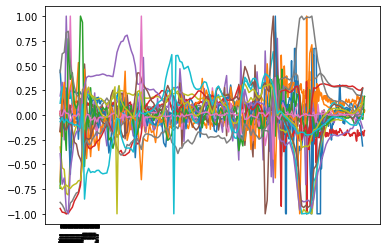

In [344]:
plt.clf()
plot_recording(recordings[0])

2628
13.206030150753769

4068
20.44221105527638

4068
20.44221105527638

4068
20.44221105527638

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406

200
1.0050251256281406



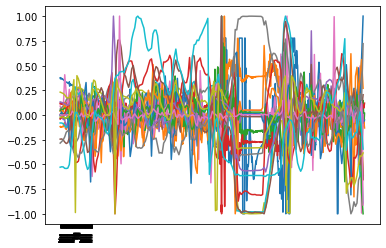

In [345]:
plot_recording(recordings[1])